In [1]:
!pip install bltk

##**Importing Libraries**


In [2]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [3]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [4]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['‡¶Ö', '‡¶Ü', '‡¶á', '‡¶à', '‡¶â', '‡¶ä', '‡¶ã', '‡¶å', '‡¶è', '‡¶ê', '‡¶ì', '‡¶î']
Vowel signs: ['‡¶æ', '‡¶ø', '‡ßÄ', '‡ßÅ', '‡ßÇ', '‡ßÉ', '‡ßÑ', '‡ßá', '‡ßà', '‡ßã', '‡ßå']
Consonants: ['‡¶ï', '‡¶ñ', '‡¶ó', '‡¶ò', '‡¶ô', '‡¶ö', '‡¶õ', '‡¶ú', '‡¶ù', '‡¶û', '‡¶ü', '‡¶†', '‡¶°', '‡¶¢', '‡¶£', '‡¶§', '‡¶•', '‡¶¶', '‡¶ß', '‡¶®', '‡¶™', '‡¶´', '‡¶¨', '‡¶≠', '‡¶Æ', '‡¶Ø', '‡¶∞', '‡¶≤', '‡¶∂', '‡¶∑', '‡¶∏', '‡¶π', '‡ßú', '‡ßù', '‡ßü', '‡ßé', '‡¶Ç', '‡¶É', '‡¶Å']
Digits: ['‡ß¶', '‡ßß', '‡ß®', '‡ß©', '‡ß™', '‡ß´', '‡ß¨', '‡ß≠', '‡ßÆ', '‡ßØ']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '√ó', '√∑']
Punctuation marks: ['‡•§', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '‚Äì', '‚Äî', '‚Äï', '~']
Others: ['‡ß≥', '‡ß∫', '‡ßç', '‡¶Ä', '‡¶Ω', '#', '$']


In [5]:
INPUT_FILE = "ecommerce_dataset.txt"
stopwords_list ="stopwords.txt"

##**Dataset Preparation and Cleaning**

In [6]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()


fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
  
    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords) 
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()
    


Label:  0
Sentence:  ‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞ ‡¶Ü‡¶õ‡ßá ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®
Afert Tokenizing:  ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶Ü‡¶õ‡ßá', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
Truncating punctuation: ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶Ü‡¶õ‡ßá', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
Truncating StopWords: ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
***************************************************************************************
Label:  1
Sentence:  ‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ ‡¶∞‡¶á‡¶≤ ‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡¶§‡¶ø']
Truncating punctuation: ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡¶§‡¶ø']
Truncating StopWords: ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞']
*************************************************

Label:  1
Sentence:  ‡¶Ø‡ßá‡¶Æ‡¶®‡¶ü‡¶æ ‡¶ö‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶§‡ßá‡¶Æ‡¶®‡¶ü‡¶æ ‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø
Afert Tokenizing:  ['‡¶Ø‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶ö‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', '‡¶§‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø']
Truncating punctuation: ['‡¶Ø‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶ö‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', '‡¶§‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø']
Truncating StopWords: ['‡¶Ø‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶ö‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', '‡¶§‡ßá‡¶Æ‡¶®‡¶ü‡¶æ', '‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø']
***************************************************************************************
Label:  1
Sentence:  ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶≠‡¶æ‡¶≤‡•§
Afert Tokenizing:  ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤', '‡•§']
Truncating punctuation: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤']
Truncating StopWords: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤']
*********************************************************

Label:  1
Sentence:  ‡¶ó‡¶§‡¶ï‡¶æ‡¶≤ ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶Ü‡¶ú‡¶ï‡ßá‡¶á ‡¶π‡¶æ‡¶§‡ßá ‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø ‡¶è‡¶¨‡¶Ç ‡¶ó‡ßÅ‡¶£‡¶ó‡¶§ ‡¶Æ‡¶æ‡¶®‡ßá‡¶∞ ‡¶¶‡¶ø‡¶ï ‡¶¶‡¶ø‡¶Ø‡¶º‡ßá ‡¶¨‡¶≤‡¶§‡ßá ‡¶π‡¶Ø‡¶º ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶≠‡¶æ‡¶≤‡ßã ‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶ ‡¶ú‡¶æ‡¶®‡¶æ‡¶ö‡ßç‡¶õ‡¶ø ‡¶ì ‡¶Ö‡¶®‡ßá‡¶ï ‡¶∂‡ßÅ‡¶≠‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ ‡¶∞‡¶á‡¶≤‡ßã‡•§
Afert Tokenizing:  ['‡¶ó‡¶§‡¶ï‡¶æ‡¶≤', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', '‡¶Ü‡¶ú‡¶ï‡ßá‡¶á', '‡¶π‡¶æ‡¶§‡ßá', '‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø', '‡¶è‡¶¨‡¶Ç', '‡¶ó‡ßÅ‡¶£‡¶ó‡¶§', '‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶¶‡¶ø‡¶ï', '‡¶¶‡¶ø‡¶Ø‡¶º‡ßá', '‡¶¨‡¶≤‡¶§‡ßá', '‡¶π‡¶Ø‡¶º', '‡¶ñ‡ßÅ‡¶¨‡¶á', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '‡¶ú‡¶æ‡¶®‡¶æ‡¶ö‡ßç‡¶õ‡¶ø', '‡¶ì', '‡¶Ö‡¶®‡ßá‡¶ï', '‡¶∂‡ßÅ‡¶≠‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ', '‡¶∞‡¶á‡¶≤‡ßã', '‡•§']
Truncating punctuation: ['‡¶ó‡¶§‡¶ï‡¶æ‡¶≤', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', '‡¶Ü‡¶ú‡¶ï‡ßá‡¶á', '‡¶π‡¶æ‡¶§‡ßá', '‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø', '‡¶è‡¶¨‡¶Ç', '‡¶ó‡ßÅ‡¶£‡¶ó‡¶§', '‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶¶‡¶ø‡¶ï', '‡¶¶‡¶ø‡

Sentence:  ‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ ‡¶è‡¶∞ ‡¶Æ‡¶§‡ßã ‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü ‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏ ‡¶Æ‡¶®‡ßá ‡¶π‡ßü ‡¶®‡¶æ ‡¶ï‡ßã‡¶®‡ßã ‡¶á-‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏ ‡¶Ü‡¶õ‡ßá‡•§ ‡¶á‡¶≤‡ßá‡¶ï‡¶ü‡ßç‡¶∞‡¶®‡¶ø‡¶ï ‡¶ó‡ßç‡¶Ø‡¶æ‡¶ú‡ßá‡¶ü‡¶∏ ‡¶è‡¶∞ ‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ ‡¶¨‡ßá‡¶∏‡ßç‡¶ü
Afert Tokenizing:  ['‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ', '‡¶è‡¶∞', '‡¶Æ‡¶§‡ßã', '‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏', '‡¶Æ‡¶®‡ßá', '‡¶π‡ßü', '‡¶®‡¶æ', '‡¶ï‡ßã‡¶®‡ßã', '‡¶á-‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏', '‡¶Ü‡¶õ‡ßá', '‡•§', '‡¶á‡¶≤‡ßá‡¶ï‡¶ü‡ßç‡¶∞‡¶®‡¶ø‡¶ï', '‡¶ó‡ßç‡¶Ø‡¶æ‡¶ú‡ßá‡¶ü‡¶∏', '‡¶è‡¶∞', '‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ', '‡¶¨‡ßá‡¶∏‡ßç‡¶ü']
Truncating punctuation: ['‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ', '‡¶è‡¶∞', '‡¶Æ‡¶§‡ßã', '‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏', '‡¶Æ‡¶®‡ßá', '‡¶π‡ßü', '‡¶®‡¶æ', '‡¶ï‡ßã‡¶®‡ßã', '‡¶á-‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏', '‡¶Ü‡¶õ‡ßá', '‡¶á‡¶≤‡ßá‡¶ï‡¶ü‡ßç‡¶∞‡¶®‡¶ø‡¶ï', '‡¶ó‡ßç‡¶Ø‡¶æ‡¶ú‡ßá‡¶ü‡¶∏', '‡¶è‡¶∞', '‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ', '‡¶¨‡ßá‡¶∏‡ßç‡¶ü']
Truncating StopWords: ['‡¶™‡¶ø‡¶ï‡¶æ‡¶¨‡ßÅ', '‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏',

Sentence:  ‡¶ñ‡ßÅ‡¶¨ ‡¶π‡¶§‡¶æ‡¶∂‡¶æ‡¶ú‡¶®‡¶ï ‡¶§‡¶æ‡¶á ‡¶Ü‡¶Æ‡¶ø ‡¶è‡¶ñ‡¶® ‡¶Ö‡¶®‡ßç‡¶Ø ‡¶ï‡ßã‡¶•‡¶æ‡¶ì ‡¶ï‡ßá‡¶®‡¶æ‡¶ï‡¶æ‡¶ü‡¶æ ‡¶ï‡¶∞‡¶õ‡¶ø‡•§
Afert Tokenizing:  ['‡¶ñ‡ßÅ‡¶¨', '‡¶π‡¶§‡¶æ‡¶∂‡¶æ‡¶ú‡¶®‡¶ï', '‡¶§‡¶æ‡¶á', '‡¶Ü‡¶Æ‡¶ø', '‡¶è‡¶ñ‡¶®', '‡¶Ö‡¶®‡ßç‡¶Ø', '‡¶ï‡ßã‡¶•‡¶æ‡¶ì', '‡¶ï‡ßá‡¶®‡¶æ‡¶ï‡¶æ‡¶ü‡¶æ', '‡¶ï‡¶∞‡¶õ‡¶ø', '‡•§']
Truncating punctuation: ['‡¶ñ‡ßÅ‡¶¨', '‡¶π‡¶§‡¶æ‡¶∂‡¶æ‡¶ú‡¶®‡¶ï', '‡¶§‡¶æ‡¶á', '‡¶Ü‡¶Æ‡¶ø', '‡¶è‡¶ñ‡¶®', '‡¶Ö‡¶®‡ßç‡¶Ø', '‡¶ï‡ßã‡¶•‡¶æ‡¶ì', '‡¶ï‡ßá‡¶®‡¶æ‡¶ï‡¶æ‡¶ü‡¶æ', '‡¶ï‡¶∞‡¶õ‡¶ø']
Truncating StopWords: ['‡¶π‡¶§‡¶æ‡¶∂‡¶æ‡¶ú‡¶®‡¶ï', '‡¶ï‡ßã‡¶•‡¶æ‡¶ì', '‡¶ï‡ßá‡¶®‡¶æ‡¶ï‡¶æ‡¶ü‡¶æ', '‡¶ï‡¶∞‡¶õ‡¶ø']
***************************************************************************************
Label:  0
Sentence:  ‡¶Ü‡¶≤‡ßÄ‡¶è‡¶ï‡ßç‡¶∏‡¶™‡ßç‡¶∞‡ßá‡¶∏ ‡¶Ü‡¶∞ ‡¶∏‡¶∏‡ßç‡¶§‡¶æ ‡¶®‡¶Ø‡¶º, ‡¶Ö‡¶®‡ßá‡¶ï ‡¶Ü‡¶á‡¶ü‡ßá‡¶Æ ‡¶®‡¶∞‡¶ì‡¶Ø‡¶º‡ßá‡¶∞ ‡¶ö‡ßá‡¶Ø‡¶º‡ßá ‡¶¨‡ßá‡¶∂‡¶ø ‡¶¶‡¶æ‡¶Æ‡¶ø ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶ó‡ßÅ‡¶£‡¶Æ‡¶æ‡¶® ‡¶∏‡¶¨‡¶∏‡¶Æ‡¶Ø‡¶º ‡¶≠‡¶æ‡¶≤‡ßã ‡¶®‡¶Ø‡¶º ‡¶§‡¶æ ‡¶ï‡¶≤‡ßç‡

Truncating punctuation: ['‡¶ï‡¶ø', '‡¶¨‡ßã‡¶≤‡¶¨‡ßã', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶ï‡ßã‡¶∞‡¶≤‡¶æ‡¶Æ', '‡¶∏‡¶æ‡¶¶‡¶æ', '‡¶¶‡¶ø‡¶≤‡ßã', '‡¶¨‡ßç‡¶≤‡ßÅ,‡¶è‡¶ü‡¶æ', '‡¶†‡¶ø‡¶ï‡¶®‡¶æ,‡¶è‡¶õ‡¶æ‡¶∞‡¶æ', '‡¶∏‡¶¨', '‡¶†‡¶ø‡¶ï', '‡¶Ü‡¶õ‡ßá', '‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ü‡¶ø‡¶Ç', '‡¶≠‡¶æ‡¶≤', '‡¶õ‡¶ø‡¶≤,‡¶®‡¶§‡ßÅ‡¶®', '‡¶Æ‡¶æ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá,‡¶∏‡¶æ‡¶â‡¶®‡ßç‡¶°', '‡¶≠‡¶æ‡¶≤‡ßã‡¶á‡•§']
Truncating StopWords: ['‡¶¨‡ßã‡¶≤‡¶¨‡ßã', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶ï‡ßã‡¶∞‡¶≤‡¶æ‡¶Æ', '‡¶∏‡¶æ‡¶¶‡¶æ', '‡¶¶‡¶ø‡¶≤‡ßã', '‡¶¨‡ßç‡¶≤‡ßÅ,‡¶è‡¶ü‡¶æ', '‡¶†‡¶ø‡¶ï‡¶®‡¶æ,‡¶è‡¶õ‡¶æ‡¶∞‡¶æ', '‡¶†‡¶ø‡¶ï', '‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ü‡¶ø‡¶Ç', '‡¶≠‡¶æ‡¶≤', '‡¶õ‡¶ø‡¶≤,‡¶®‡¶§‡ßÅ‡¶®', '‡¶Æ‡¶æ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá,‡¶∏‡¶æ‡¶â‡¶®‡ßç‡¶°', '‡¶≠‡¶æ‡¶≤‡ßã‡¶á‡•§']
***************************************************************************************
Label:  1
Sentence:  ‡¶Ø‡ßá ‡¶ü‡ßá‡¶™ ‡¶¶‡ßá‡¶ì‡¶Ø‡¶º‡¶æ ‡¶π‡¶Ø‡¶º‡ßá‡¶õ‡ßá ‡¶§‡¶æ ‡¶™‡ßÇ‡¶∞‡¶æ‡¶§‡¶® ‡¶è‡¶ï ‡¶™‡¶æ‡¶∂‡ßá ‡¶Æ‡¶Ø‡¶º‡¶≤‡¶æ ‡¶≤‡¶æ‡¶ó‡¶æ‡¶®‡ßã ‡•§ ‡¶Ö‡¶®‡ßç‡¶Ø ‡¶™‡¶æ‡¶∂ ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡

Truncating punctuation: ['‡¶¶‡¶æ‡¶Æ', '‡¶ü‡¶æ', '‡¶Ü‡¶ó‡ßá‡¶∞', '‡¶•‡ßá‡¶ï‡ßá', '‡¶è‡¶ü‡ßÅ', '‡¶¨‡ßá‡¶∂‡¶ø']
Truncating StopWords: ['‡¶¶‡¶æ‡¶Æ', '‡¶ü‡¶æ', '‡¶Ü‡¶ó‡ßá‡¶∞', '‡¶è‡¶ü‡ßÅ', '‡¶¨‡ßá‡¶∂‡¶ø']
***************************************************************************************
Label:  1
Sentence:  "‡¶≠‡¶æ‡¶≤‡¶≠‡¶æ‡¶¨‡ßá ‡¶™‡ßá‡¶≤‡¶æ‡¶Æ,‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶æ ‡¶π‡ßü‡¶®‡¶ø"
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶≤‡¶≠‡¶æ‡¶¨‡ßá', '"', '‡¶™‡ßá‡¶≤‡¶æ‡¶Æ,‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞', '‡¶ï‡¶∞‡¶æ', '‡¶π‡ßü‡¶®‡¶ø', '"']
Truncating punctuation: ['‡¶≠‡¶æ‡¶≤‡¶≠‡¶æ‡¶¨‡ßá', '‡¶™‡ßá‡¶≤‡¶æ‡¶Æ,‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞', '‡¶ï‡¶∞‡¶æ', '‡¶π‡ßü‡¶®‡¶ø']
Truncating StopWords: ['‡¶≠‡¶æ‡¶≤‡¶≠‡¶æ‡¶¨‡ßá', '‡¶™‡ßá‡¶≤‡¶æ‡¶Æ,‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞', '‡¶π‡ßü‡¶®‡¶ø']
***************************************************************************************
Label:  1
Sentence:  "‡¶Ö‡¶®‡ßá‡¶ï ‡¶≠‡¶æ‡¶≤‡ßã, ‡¶Ü‡¶¨‡¶æ‡¶∞ ‡¶®‡¶ø‡¶¨‡ßã"
Afert Tokenizing:  ['‡¶Ö‡¶®‡ßá‡¶ï', '"', '‡¶≠‡¶æ‡¶≤‡ßã', ',', '‡¶Ü‡¶¨‡¶æ‡¶∞', '‡¶®‡¶ø‡¶¨‡ßã'

Sentence:  ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶æ‡¶õ ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡ßá‡¶∏ ‡¶ï‡¶∞‡¶≤‡ßá ‡¶ï‡ßã‡¶®‡ßã ‡¶â‡¶§‡ßç‡¶§‡¶∞ ‡¶¶‡ßá‡¶® ‡¶®‡¶æ ‡¶ï‡ßá‡¶®‡ßã
Afert Tokenizing:  ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ï‡¶æ‡¶õ', '‡¶ï‡¶ø‡¶õ‡ßÅ', '‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡ßá‡¶∏', '‡¶ï‡¶∞‡¶≤‡ßá', '‡¶ï‡ßã‡¶®‡ßã', '‡¶â‡¶§‡ßç‡¶§‡¶∞', '‡¶¶‡ßá‡¶®', '‡¶®‡¶æ', '‡¶ï‡ßá‡¶®‡ßã']
Truncating punctuation: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ï‡¶æ‡¶õ', '‡¶ï‡¶ø‡¶õ‡ßÅ', '‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡ßá‡¶∏', '‡¶ï‡¶∞‡¶≤‡ßá', '‡¶ï‡ßã‡¶®‡ßã', '‡¶â‡¶§‡ßç‡¶§‡¶∞', '‡¶¶‡ßá‡¶®', '‡¶®‡¶æ', '‡¶ï‡ßá‡¶®‡ßã']
Truncating StopWords: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡ßá‡¶∏', '‡¶®‡¶æ', '‡¶ï‡ßá‡¶®‡ßã']
***************************************************************************************
Label:  0
Sentence:  "‡¶è‡¶á ‡¶ì‡¶°‡¶æ‡¶∞‡¶ü‡¶æ ‡¶è‡¶ñ‡¶® ‡¶ì ‡¶™‡ßá‡¶≤‡¶æ‡¶Æ ‡¶®‡¶æ‡•§
Afert Tokenizing:  ['‡¶è‡¶á', '"', '‡¶ì‡¶°‡¶æ‡¶∞‡¶ü‡¶æ', '‡¶è‡¶ñ‡¶®', '‡¶ì', '‡¶™‡ßá‡¶≤‡¶æ‡¶Æ', '‡¶®‡¶æ', '‡•§']
Truncating punctuation: ['‡¶è‡¶á', '‡¶ì‡¶°‡¶æ‡¶∞‡¶ü‡¶æ', '‡¶è‡¶ñ‡¶®', '‡¶ì', '‡

Truncating StopWords: ['‡¶™‡ßç‡¶∞‡¶ø‡ßü', '‡¶¶‡¶æ‡¶∞‡¶æ‡¶ú', '‡¶ñ‡¶æ‡¶ó‡ßú‡¶æ‡¶õ‡ßú‡¶ø‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø‡¶∞', '‡¶¨‡ßü', '‡¶ó‡ßÅ‡¶≤‡ßã', '‡¶Æ‡¶∞‡¶õ‡ßá', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶ñ‡ßã‡¶ú', '‡¶¶‡ßá‡¶ñ‡ßá‡¶®', '‡¶ó‡¶§', '‡¶™‡¶∞‡¶∂‡ßÅ', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶∏', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶∞', '‡¶®‡¶æ‡¶Æ', '‡¶ó‡¶®‡ßç‡¶ß', '‡¶®‡¶æ‡¶á', '']
***************************************************************************************
Label:  0
Sentence:  ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó ‡¶¶‡¶ø‡¶≤‡ßá ‡¶ï‡¶æ‡¶ú ‡¶π‡¶Ø‡¶º ‡¶®‡¶æ‡•§
Afert Tokenizing:  ['‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó', '‡¶¶‡¶ø‡¶≤‡ßá', '‡¶ï‡¶æ‡¶ú', '‡¶π‡¶Ø‡¶º', '‡¶®‡¶æ', '‡•§']
Truncating punctuation: ['‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó', '‡¶¶‡¶ø‡¶≤‡ßá', '‡¶ï‡¶æ‡¶ú', '‡¶π‡¶Ø‡¶º', '‡¶®‡¶æ']
Truncating StopWords: ['‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó', '‡¶¶‡¶ø‡¶≤‡ßá', '‡¶®‡¶æ']
***************************************************************************************
Label:  0
Sentence:  ‡¶è‡¶≠‡¶æ‡¶¨‡ßá ‡¶π‡¶Ø‡¶º‡¶∞‡¶æ‡¶®‡¶ø ‡¶ï‡¶∞‡¶æ ‡¶π‡¶≤‡ßá ‡¶≠‡ßã‡¶ï‡ßç‡¶§‡¶æ ‡¶Ö‡¶ß

Truncating StopWords: ['‡¶´‡ßç‡¶∞‡ßá‡¶∂', '‡¶®‡¶æ']
***************************************************************************************


In [7]:
xs

['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®',
 '‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ ‡¶∞‡¶á‡¶≤ ‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞',
 '‡¶Ü‡¶ó‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶ï‡ßç‡¶≤‡¶ø‡ßü‡¶æ‡¶∞ ‡¶§‡¶æ‡¶∞‡¶æ‡¶§‡¶æ‡ßú‡¶ø',
 '‡¶≠‡¶æ‡¶≤ ‡¶≤‡¶æ‡¶ó‡¶§‡ßá‡¶õ‡ßá ‡¶®‡¶æ',
 '‡¶¶‡ßü‡¶æ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶≠‡¶æ‡¶á ‡¶™‡¶æ‡¶¨‡ßã',
 '‡¶∏‡¶†‡¶ø‡¶ï ‡¶§‡¶æ‡¶∞‡¶ø‡¶ñ‡ßá ‡¶¶‡¶ø‡¶§‡ßá‡¶® ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó ‡¶¶‡¶ø‡¶§ ‡¶®‡¶æ',
 '‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞ ‡¶∏‡¶æ‡¶•‡ßá ‡¶ï‡¶∞‡¶§‡ßá‡¶õ‡ßá ‡¶è‡¶ï‡¶¶‡¶ø‡¶® ‡¶π‡¶ø‡¶∏‡¶æ‡¶¨ ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶°‡¶º‡¶æ‡ßü ‡¶ò‡¶®‡ßç‡¶°‡¶æ‡ßü',
 '‡¶´‡¶æ‡¶á‡¶ú‡¶≤‡¶æ‡¶Æ‡¶ø!!',
 '‡¶¶‡ßÄ‡¶∞‡ßç‡¶ò ‡¶π‡¶æ‡¶Ø‡¶º‡¶æ‡¶§ ‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶Ö‡¶°‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶®‡¶æ‡¶á ‡¶∏‡ßç‡¶¨‡¶™‡ßç‡¶®‡ßá‡¶∞ ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶™‡ßç‡¶∞‡ßü‡ßã‡¶ú‡¶®‡ßÄ‡ßü ‡¶¨‡¶æ‡¶á‡¶ï‡¶ü‡¶æ ‡¶™‡¶æ‡¶¨ ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶®‡ßç‡¶Ø ‡¶ó‡ßç‡¶∞‡ßã‡¶∏‡¶æ‡¶∞‡¶ø ‡¶Ü‡¶á‡¶ü‡ßá‡¶Æ ‡¶™‡¶æ‡¶∞‡¶≤‡ßá‡¶® ‡¶®‡¶æ ‡ß© ‡¶Æ‡¶æ‡¶∏‡ßá',
 '‡¶Ø‡ßÅ‡¶¨‡¶ï‡ßá‡¶∞

##**TF-IDF**

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['‡¶ñ‡ßÅ‡¶¨‡¶ø ‡¶¨‡¶æ‡¶ú‡ßá ‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø ‡¶≠‡¶æ‡¶á ‡¶°‡¶ø‡¶ú‡¶æ‡¶á‡¶® ‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡¶æ‡¶ó‡¶õ‡¶ø‡¶≤ ‡¶ï‡¶ø‡¶®‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶¶‡¶æ‡¶Æ ‡¶¶‡¶ø‡ßü‡ßá‡¶ì ‡¶¨‡¶æ‡¶ü ‡¶™‡ßÅ‡¶∞‡¶æ‡¶á ‡¶¨‡¶æ‡¶ú‡ßá',
 '"‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ø‡ßá‡¶ü‡¶æ ‡¶ì‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶õ‡¶ø ‡¶™‡¶æ‡¶á‡¶õ‡¶ø‡•§‡¶Ö‡¶≤‡ßç‡¶™ ‡¶¶‡¶æ‡¶Æ‡ßá ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶≠‡¶æ‡¶≤‡ßã ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü',
 '‡¶Æ‡¶æ‡¶∏‡ßá ‡ß´/‡ß¨ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶® ‡¶Ü‡¶∏‡¶§‡ßã ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶¶‡¶ø‡¶§‡ßá,,‡¶è‡¶ñ‡¶® ‡¶è‡¶ï ‡¶è‡¶ï ‡¶¨‡¶æ‡¶∞‡¶ì ‡¶Ü‡¶∏‡ßá ‡¶®‡¶æ,,‡¶ï‡¶æ‡¶∞‡¶£ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶ö‡¶æ‡¶∞‡ßç‡¶ú ‡¶¨‡¶æ‡ßú‡¶æ‡¶®‡ßã‡¶∞ ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞‡¶á ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡ßá‡¶ó‡ßá‡¶õ‡ßá',
 '‡¶è‡¶ï ‡¶Ü‡¶∞‡ßá‡¶ï ‡ß∑ ‡¶ö‡¶ø‡¶ü‡¶ø‡¶Ç',
 '‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™ ‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ',
 '‡¶¶‡ßÅ‡¶á‡¶ü‡¶æ ‡¶®‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡¶ø ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞',
 '‡¶π‡¶æ‡¶á‡¶≤‡¶ø ‡¶∞‡¶ø‡¶ï‡¶Æ‡ßá‡¶®‡ßç‡¶°‡¶°',
 '‡¶∞‡¶Æ‡¶ú‡¶æ‡¶®‡ßá‡¶∞ ‡¶ü‡¶ø-‡¶∂‡¶æ‡¶∞‡ßç‡¶ü ‡¶¶‡¶æ

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [10]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [11]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


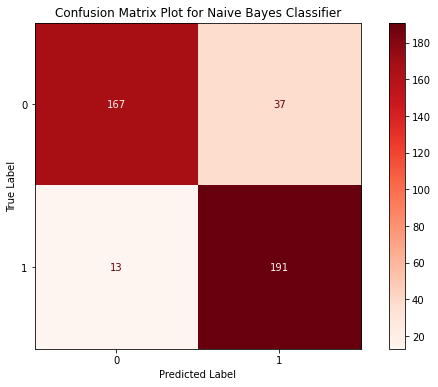

In [12]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [13]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


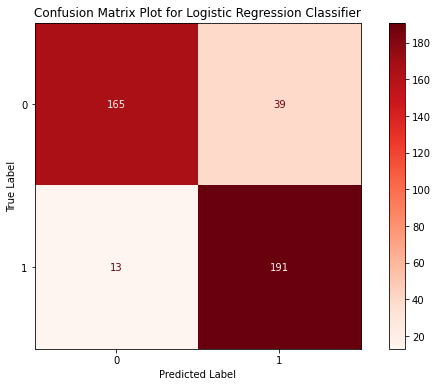

In [15]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = plot_confusion_matrix(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [16]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

##**Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


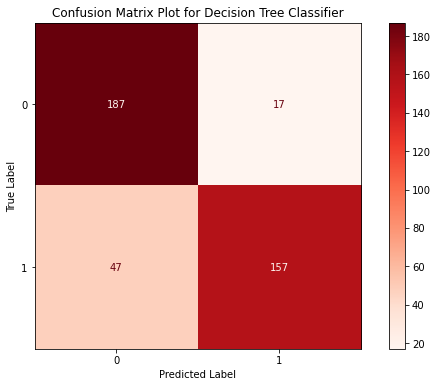

In [18]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [19]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


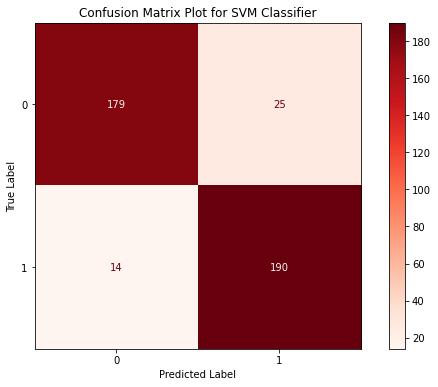

In [21]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [22]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


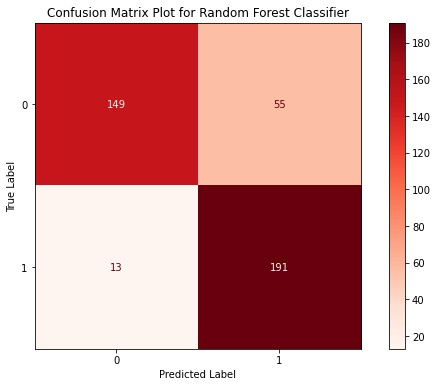

In [24]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [25]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[177  27]
 [ 16 188]]
0.8946078431372549
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       204
           1       0.87      0.92      0.90       204

    accuracy                           0.89       408
   macro avg       0.90      0.89      0.89       408
weighted avg       0.90      0.89      0.89       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


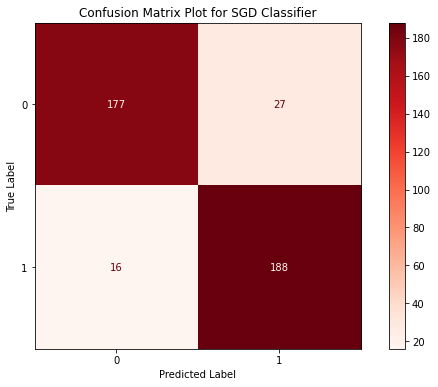

In [27]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [28]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [29]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


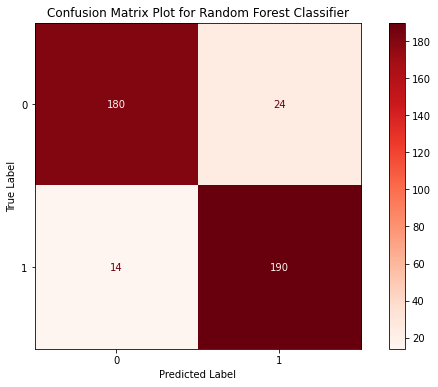

In [30]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [31]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 432x288 with 0 Axes>

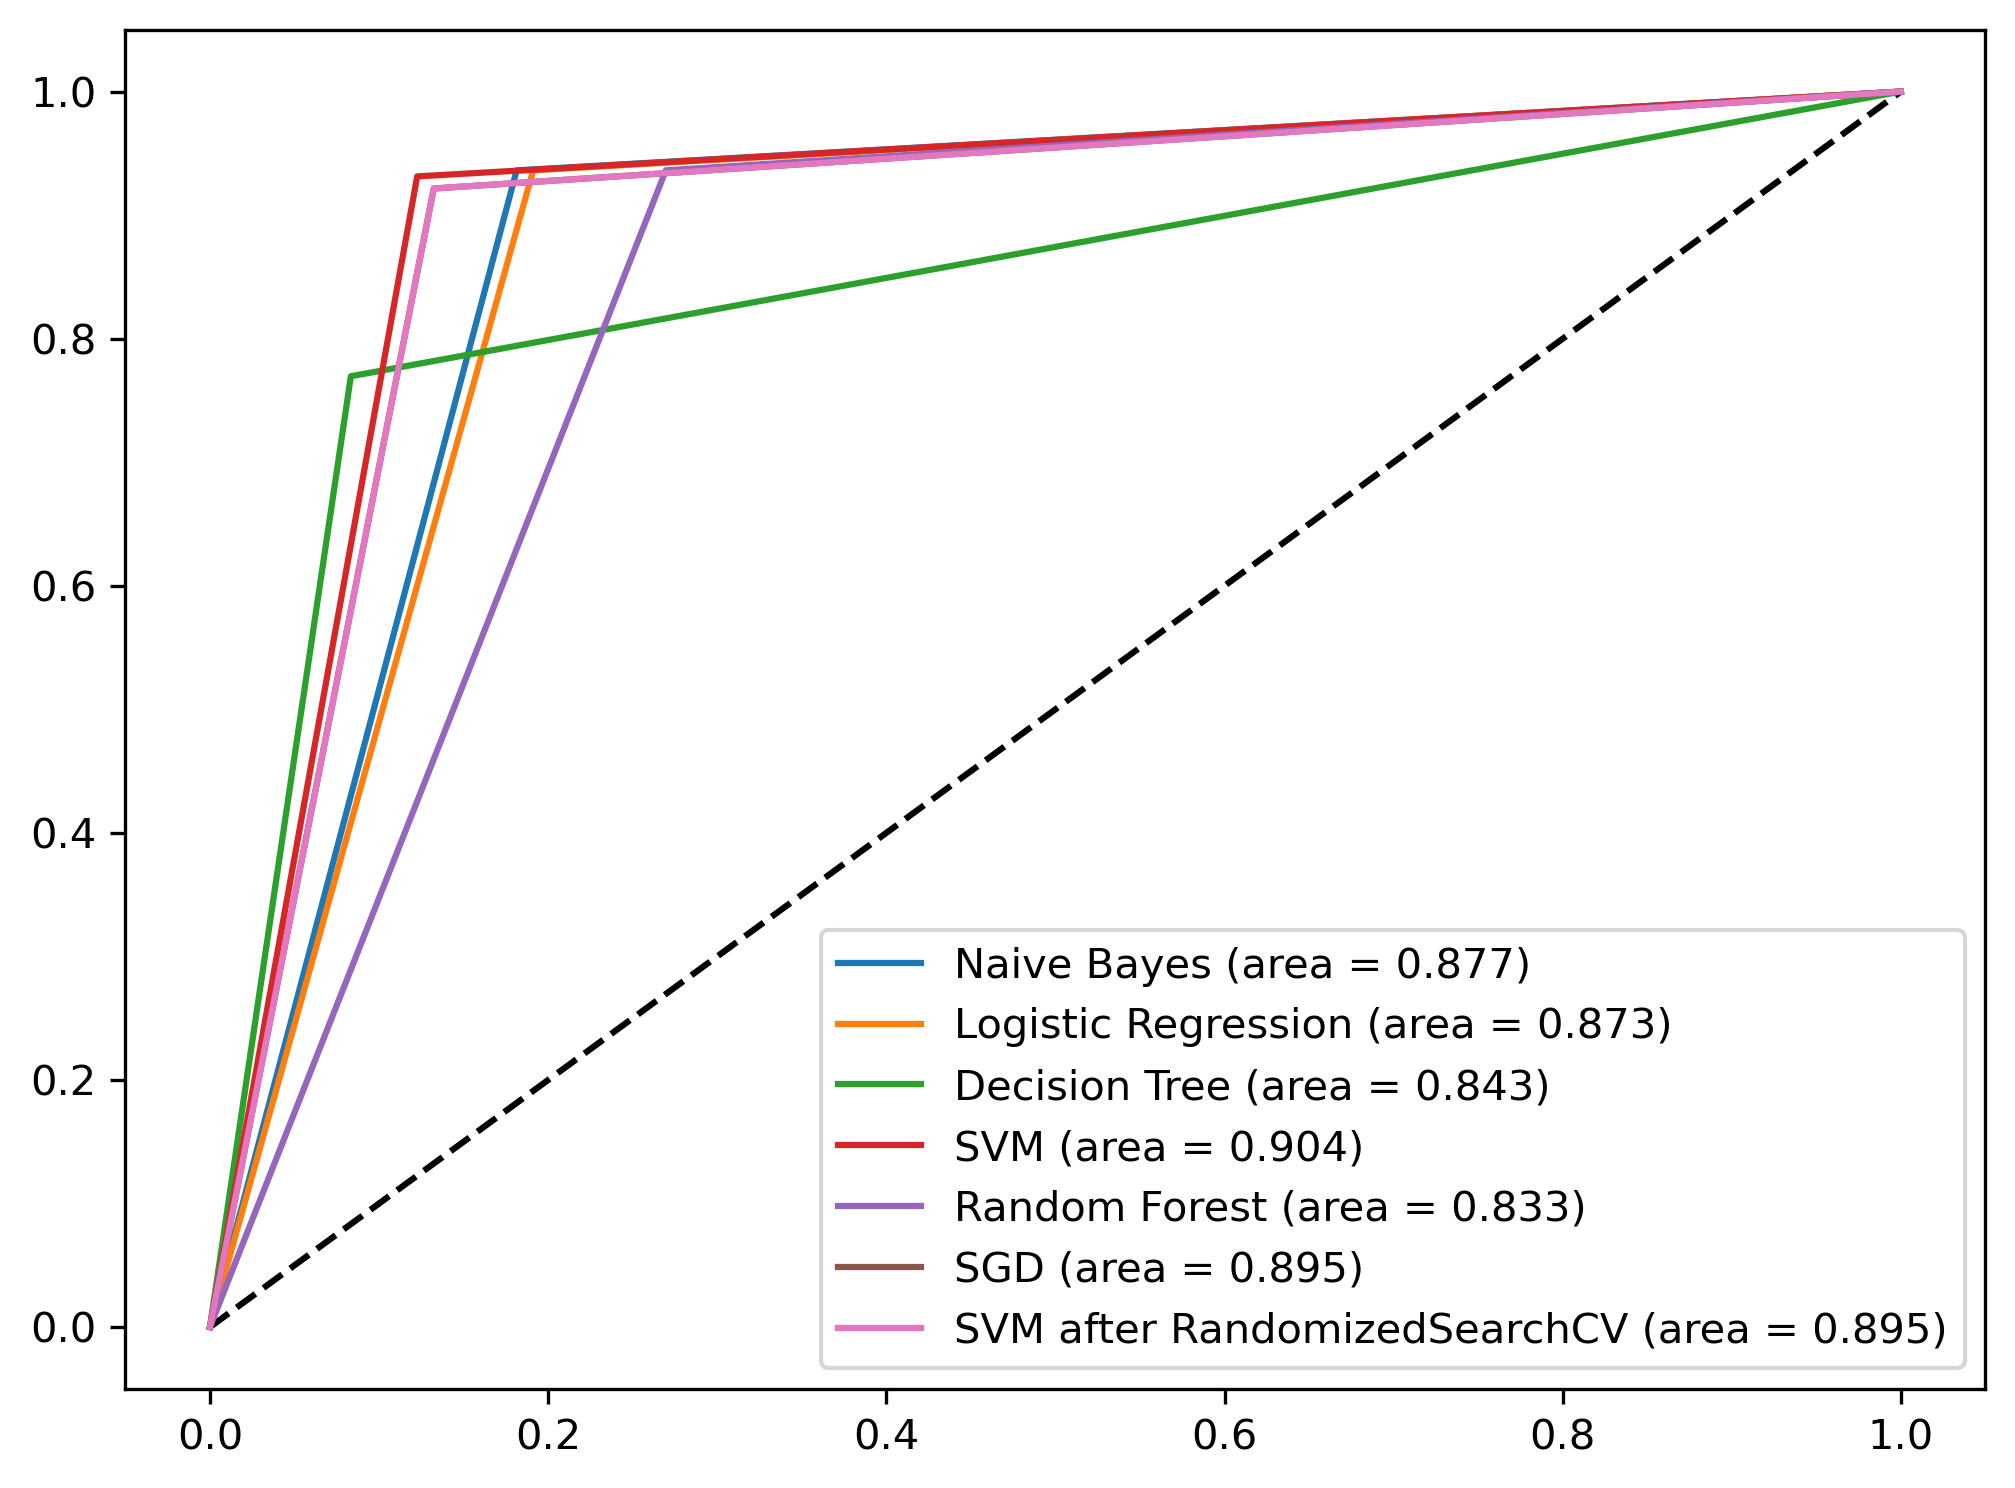

In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()

# DL starts

In [35]:
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
import collections
import nltk
import numpy as np
import codecs

In [58]:
np.random.seed(42)
INPUT_FILE = "ecommerce_dataset.txt"
VOCAB_SIZE = 10000
EMBED_SIZE = 300
NUM_FILTERS = 256
NUM_WORDS = 3
BATCH_SIZE = 256
NUM_EPOCHS = 100

In [37]:
print("Maximum number of word in a sentence: ",maxlen)
print("Frequency of each words: ")
counter

Maximum number of word in a sentence:  28
Frequency of each words: 


Counter({'‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ': 1,
         '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞': 4,
         '‡¶è‡¶ï‡¶ü‡ßÅ': 36,
         '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®': 2,
         '‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ': 2,
         '‡¶∞‡¶á‡¶≤': 8,
         '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞': 4,
         '‡¶Ü‡¶ó‡ßá‡¶∞': 7,
         '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü': 51,
         '‡¶ï‡ßç‡¶≤‡¶ø‡ßü‡¶æ‡¶∞': 1,
         '‡¶§‡¶æ‡¶∞‡¶æ‡¶§‡¶æ‡ßú‡¶ø': 2,
         '‡¶≠‡¶æ‡¶≤': 101,
         '‡¶≤‡¶æ‡¶ó‡¶§‡ßá‡¶õ‡ßá': 2,
         '‡¶®‡¶æ': 251,
         '‡¶¶‡ßü‡¶æ': 3,
         '‡¶≠‡¶æ‡¶á': 43,
         '‡¶™‡¶æ‡¶¨‡ßã': 14,
         '‡¶∏‡¶†‡¶ø‡¶ï': 10,
         '‡¶§‡¶æ‡¶∞‡¶ø‡¶ñ‡ßá': 12,
         '‡¶¶‡¶ø‡¶§‡ßá‡¶®': 1,
         '‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó': 8,
         '‡¶¶‡¶ø‡¶§': 2,
         '‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏‡ßá‡¶∞': 1,
         '‡¶®‡¶æ‡¶Æ‡ßá': 9,
         '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ': 33,
         '‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞': 8,
         '‡¶∏‡¶æ‡¶•‡ßá': 34,
         '‡¶ï‡¶∞‡¶§‡ßá‡¶õ‡ßá': 3,
         '‡¶è‡¶ï‡¶¶‡¶ø‡¶®': 4,
         '‡¶π‡¶ø‡¶∏‡¶æ‡¶¨': 1,
         '‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá

In [38]:
word2index = collections.defaultdict(int) 
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1

word2index  

defaultdict(int,
            {'‡¶≠‡¶æ‡¶≤‡ßã': 1,
             '‡¶®‡¶æ': 2,
             '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞': 3,
             '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü': 4,
             '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø': 5,
             '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞': 6,
             '‡¶¶‡¶æ‡¶Æ': 7,
             '‡¶≠‡¶æ‡¶≤': 8,
             '‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞': 9,
             '‡¶ü‡¶æ': 10,
             '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶': 11,
             '': 12,
             '‡¶®‡¶æ‡¶á': 13,
             '‡¶è‡¶ï‡¶ü‡¶æ': 14,
             '‡¶ñ‡ßÅ‡¶¨‡¶á': 15,
             '‡¶¨‡ßá‡¶∂‡¶ø': 16,
             '‡¶™‡ßá‡ßü‡ßá‡¶õ‡¶ø': 17,
             '‡¶ü‡¶æ‡¶ï‡¶æ': 18,
             '‡¶™‡¶£‡ßç‡¶Ø': 19,
             '‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π': 20,
             '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü': 21,
             '‡¶†‡¶ø‡¶ï': 22,
             '‡¶π‡¶æ‡¶§‡ßá': 23,
             '‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø': 24,
             '‡¶ï‡¶Æ': 25,
             '‡¶Æ‡¶æ‡¶®': 26,
             '‡¶≠‡¶æ‡¶á': 27,
             '‡¶¨‡¶æ‡¶ú‡ßá': 28,

In [39]:
vocab_sz = len(word2index) + 1
print("Number of Vocabularies: ",vocab_sz)

Number of Vocabularies:  3257


In [40]:
xs, ys = [], []
fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
    label, sent = line.strip().split("\t")
    
    words = tokenizer.word_tokenizer(sent)
    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    wordsExcludingStopWords=remove_stopwords(wordsExcludingPunctuationMarks, level='soft')
    
    wids = [word2index[word] for word in wordsExcludingStopWords]

    ys.append(int(label))
    xs.append(wids)
fin.close()

In [41]:
xs

[[1101, 365, 39, 663],
 [664, 176, 366, 0],
 [202, 21, 1102, 0, 665],
 [0, 8, 666],
 [474, 39, 0, 27, 0, 96],
 [139, 116, 1103, 0, 177, 667],
 [0, 1104, 157, 43, 0, 178, 42, 0, 475, 367, 1105, 9, 1106, 1107, 0],
 [1108],
 [668, 1109, 127, 0],
 [27, 0, 158, 0, 80, 18, 13, 0, 1110, 476, 1111, 234],
 [27, 1112, 1113, 203, 0, 1114, 159, 368],
 [0, 1115, 369, 1116, 1117, 0],
 [49, 0, 81, 669, 370, 1118, 1119, 62, 0, 72, 1120, 11],
 [27, 37, 33, 0, 1121],
 [1122, 0, 1123, 160, 0, 86, 97, 3],
 [21, 33, 235, 294, 27],
 [117, 1124, 13, 0, 670, 5, 1125],
 [43, 0, 477, 178, 478, 1126, 0, 479, 1127],
 [1128, 1129, 1130, 49, 90, 0, 1131, 480, 236],
 [0, 1132, 128, 1133, 0, 479, 11],
 [1134, 481, 0, 1135, 1136, 12],
 [1, 0, 1, 371, 370, 482],
 [161, 1137, 1138],
 [141, 1139, 1140, 1141, 369, 1142],
 [1143, 3, 33, 295, 0, 0, 39, 98, 483, 1144],
 [0, 3, 0, 671, 484, 1145, 19, 5, 1146],
 [178, 672, 18, 1147, 1148],
 [1149, 1150, 162, 673, 0, 0],
 [1151, 485, 0],
 [296, 486, 487, 296, 488, 0, 178, 1152]

In [42]:
X = pad_sequences(xs, maxlen=maxlen)
Y = np_utils.to_categorical(ys)

In [43]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(1223, 28) (408, 28) (1223, 2) (408, 2)


# LSTM

In [44]:
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization

#embedding_vector_features=40
modelLstm=Sequential()
modelLstm.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen,trainable=True))
modelLstm.add(LSTM(256,return_sequences=True))
modelLstm.add(Dropout(0.2))
modelLstm.add(LSTM(128))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(128,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(256,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(512,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(BatchNormalization())
modelLstm.add(Dense(2,activation='softmax'))

In [45]:
modelLstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(modelLstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 300)           977100    
                                                                 
 lstm (LSTM)                 (None, 28, 256)           570368    
                                                                 
 dropout (Dropout)           (None, 28, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [59]:
history = modelLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest))

Epoch 1/100
5/5 [==============================] - 2s 332ms/step - loss: 0.0010 - accuracy: 0.9992 - val_loss: 1.2701 - val_accuracy: 0.8456
Epoch 2/100
5/5 [==============================] - 2s 325ms/step - loss: 8.9700e-04 - accuracy: 1.0000 - val_loss: 1.2710 - val_accuracy: 0.8456
Epoch 3/100
5/5 [==============================] - 2s 325ms/step - loss: 0.0012 - accuracy: 0.9992 - val_loss: 1.2717 - val_accuracy: 0.8456
Epoch 4/100
5/5 [==============================] - 2s 328ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 1.2716 - val_accuracy: 0.8456
Epoch 5/100
5/5 [==============================] - 2s 326ms/step - loss: 8.3742e-04 - accuracy: 0.9992 - val_loss: 1.2707 - val_accuracy: 0.8456
Epoch 6/100
5/5 [==============================] - 2s 360ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2697 - val_accuracy: 0.8456
Epoch 7/100
5/5 [==============================] - 2s 342ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2676 - val_accuracy: 0.8456
Epoch

5/5 [==============================] - 2s 433ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 1.2573 - val_accuracy: 0.8480
Epoch 59/100
5/5 [==============================] - 2s 442ms/step - loss: 0.0012 - accuracy: 0.9992 - val_loss: 1.2570 - val_accuracy: 0.8480
Epoch 60/100
5/5 [==============================] - 2s 463ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 1.2572 - val_accuracy: 0.8480
Epoch 61/100
5/5 [==============================] - 2s 430ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 1.2563 - val_accuracy: 0.8456
Epoch 62/100
5/5 [==============================] - 2s 409ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2558 - val_accuracy: 0.8456
Epoch 63/100
5/5 [==============================] - 2s 417ms/step - loss: 0.0025 - accuracy: 0.9984 - val_loss: 1.2558 - val_accuracy: 0.8456
Epoch 64/100
5/5 [==============================] - 2s 472ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2539 - val_accuracy: 0.8456
Epoch 65/100
5/5 [=

In [60]:
y_pred=np.argmax(modelLstm.predict(Xtest), axis=-1)
y_pred

13/13 [==============================] - 0s 28ms/step


array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [61]:
Ytest

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [62]:
y_test=np.argmax(Ytest, axis=1)
y_test

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [63]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.8431372549019608
[[168  33]
 [ 31 176]]


# CNN

In [64]:
model = Sequential()
model.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=NUM_FILTERS,kernel_size=NUM_WORDS,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation="softmax"))

In [65]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest))

Epoch 1/100
5/5 [==============================] - 1s 100ms/step - loss: 0.6830 - accuracy: 0.5413 - val_loss: 0.6688 - val_accuracy: 0.5319
Epoch 2/100
5/5 [==============================] - 0s 75ms/step - loss: 0.6341 - accuracy: 0.7285 - val_loss: 0.6240 - val_accuracy: 0.7721
Epoch 3/100
5/5 [==============================] - 0s 70ms/step - loss: 0.5630 - accuracy: 0.9052 - val_loss: 0.5672 - val_accuracy: 0.7672
Epoch 4/100
5/5 [==============================] - 0s 69ms/step - loss: 0.4679 - accuracy: 0.9125 - val_loss: 0.4879 - val_accuracy: 0.8162
Epoch 5/100
5/5 [==============================] - 0s 71ms/step - loss: 0.3534 - accuracy: 0.9338 - val_loss: 0.4155 - val_accuracy: 0.8333
Epoch 6/100
5/5 [==============================] - 0s 73ms/step - loss: 0.2455 - accuracy: 0.9460 - val_loss: 0.3687 - val_accuracy: 0.8456
Epoch 7/100
5/5 [==============================] - 0s 73ms/step - loss: 0.1594 - accuracy: 0.9665 - val_loss: 0.3397 - val_accuracy: 0.8627
Epoch 8/100
5/5 [==

5/5 [==============================] - 0s 94ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.4745 - val_accuracy: 0.8750
Epoch 60/100
5/5 [==============================] - 0s 98ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.4691 - val_accuracy: 0.8725
Epoch 61/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.4682 - val_accuracy: 0.8775
Epoch 62/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.4697 - val_accuracy: 0.8799
Epoch 63/100
5/5 [==============================] - 0s 94ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.4822 - val_accuracy: 0.8725
Epoch 64/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4873 - val_accuracy: 0.8725
Epoch 65/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.4831 - val_accuracy: 0.8725
Epoch 66/100
5/5 [========

In [67]:
y_pred=np.argmax(model.predict(Xtest), axis=-1)
y_test=np.argmax(Ytest, axis=1)

13/13 [==============================] - 0s 4ms/step


In [68]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.875
[[171  30]
 [ 21 186]]
